In [13]:
#Lets first import the related and important libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Lets load the CSV file:
df=pd.read_csv("imdb_movies.csv")
df



,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [14]:
#Now lets check the data to ensure if data needs to be clean or not beore analysis:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [15]:
#Here we noticed that "date_x" column data type needs to be chnage to date and time format,
#Which is currently in object:
df["date_x"]=pd.to_datetime(df["date_x"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


In [16]:
#Here now data types has been all corrected, however we can see some columns like,
#"genre" and "crew" showing some null values lets see how much we have got:
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [17]:
#As being these two columns as object we can't put some average values so,
#it will be better to just include null values with "unavailable":
df["genre"]= df["genre"].fillna("unavailable")
df["crew"]=df["crew"].fillna("unavailable")
df.isnull().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [18]:
#Now lets check if there is any duplicate values too:
df.duplicated().sum()
#No duplicate values which is good...

np.int64(0)

In [46]:
#Lets check some discriptive statiscal analyis from our data_set before analyis,
#We noticed that column "budget_x" and "revenue" values has been mentioned in,
#scientific way as the values were too high, here values after"+" represents,
#the 10 power of 4 in case of +04 and so on...
df.describe()

,date_x,score,budget_x,revenue,year
count,10178,10178.000000,1.017800e+04,1.017800e+04,10178.000000
mean,2008-06-15 06:16:37.445470720,63.497052,6.488238e+07,2.531401e+08,2007.945667
min,1903-05-15 00:00:00,0.000000,1.000000e+00,0.000000e+00,1903.000000
25%,2001-12-25 06:00:00,59.000000,1.500000e+07,2.858898e+07,2001.000000
50%,2013-05-09 00:00:00,65.000000,5.000000e+07,1.529349e+08,2013.000000
75%,2019-10-17 00:00:00,71.000000,1.050000e+08,4.178021e+08,2019.000000
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09,2023.000000
std,NaN,13.537012,5.707565e+07,2.777880e+08,15.317071


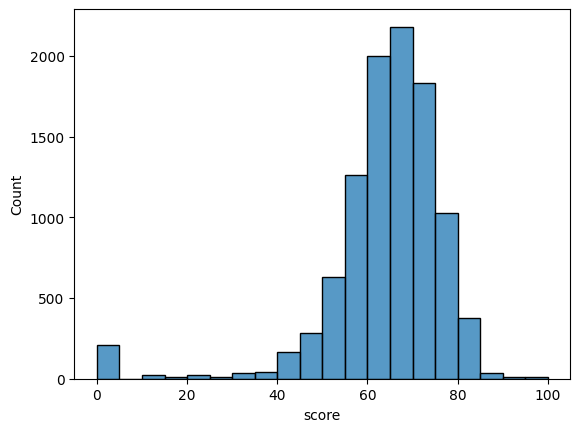

In [20]:
#Now lets do some analysis from the provided data_set:
#Univariable Analysis: Exploring each column individually:
#1.What is the distribution of scores? plot a histogram and describe its shape:
sns.histplot(x="score",data=df,bins=20)
plt.show()
#Result:Most scores lies between 65 to 75 as per data distribution which showing higher than mean value, good indication,
#Most of the movies score are above 50.
#Used bins to make chart more clear.


In [21]:
#2.What are the most common genres in the dataset?
#Here we will use the barchart to show the distribution:
#As the column"genre"had no unique values, hence we counted the unique values first.
genre_counts = df['genre'].value_counts()
print(genre_counts)



genre
Drama                                                     556
Comedy                                                    373
Drama, Romance                                            268
Horror                                                    260
Horror, Thriller                                          202
                                                         ... 
Crime, Drama, Romance, Mystery, Thriller                    1
Action, Comedy, Drama, Romance, Thriller                    1
Adventure, Animation, Comedy, Family, Fantasy, Romance      1
Drama, Crime, Documentary                                   1
Adventure, Drama, Fantasy, Family                           1
Name: count, Length: 2304, dtype: int64


In [22]:
#Now lets change it to data frame to properly put columns for visualization:
df1=pd.DataFrame(genre_counts)
df1

,count
genre,
Drama,556
Comedy,373
"Drama, Romance",268
Horror,260
"Horror, Thriller",202
...,...
"Crime, Drama, Romance, Mystery, Thriller",1
"Action, Comedy, Drama, Romance, Thriller",1
"Adventure, Animation, Comedy, Family, Fantasy, Romance",1


<Axes: xlabel='genre', ylabel='count'>

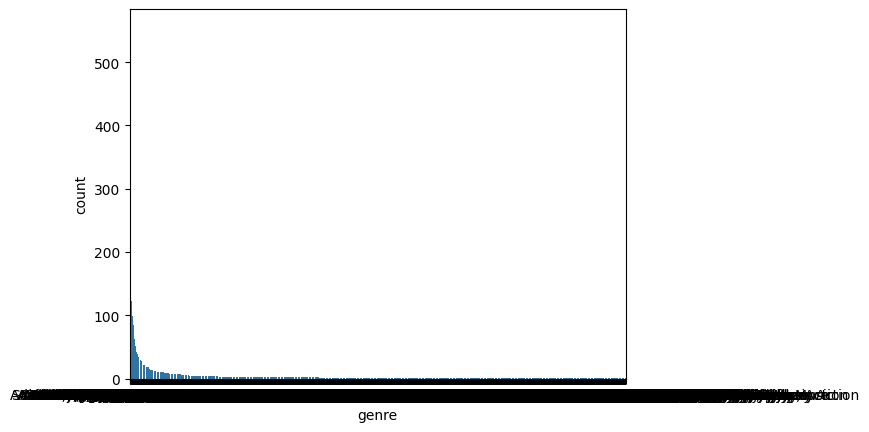

In [23]:
sns.barplot(x=df1.index,y=df1["count"],data=df1)

In [24]:
#As we can see that as genre being more than 2000 the values on x-axis in not clear,
#plus the figure size also needs to be raise.
#so we just here look for top 5 genres as the question also asked for most common
#and we will raise the figsize too...
df2= df1.head(5)
df2


,count
genre,
Drama,556
Comedy,373
"Drama, Romance",268
Horror,260
"Horror, Thriller",202


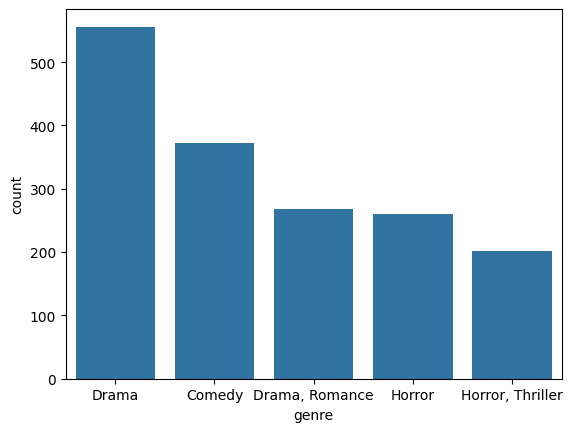

In [25]:
sns.barplot(x=df2.index,y=df2["count"],data=df2)
plt.show()
#As being lesser rows the data automatically raised it figure size....
#And here we are with the most top 5 most common generes:

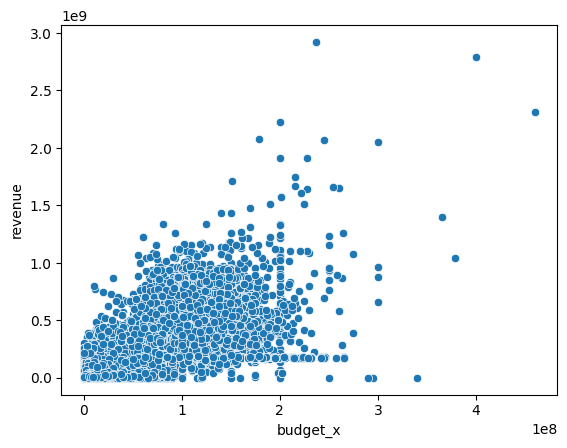

In [26]:
#Bivariate Analysis: Exploring relationship between two variables:
#1.Is there a relationship between budget and its revenue?
#Plot a scatter and describe any observed trend:
sns.scatterplot(x=df["budget_x"],y=df["revenue"],data=df)
plt.show()
#Analysis:
#Positive Trend: There appears to be a positive correlation between budget_x (presumably the budget of a movie or project) and revenue.
#As the budget increases, the revenue generally tends to increase.
#A dense cluster of points is observed near the lower left corner, indicating many projects with low budgets and revenues.
#outliers: Some high-revenue points that do not correspond to equally high budgets, which could indicate highly profitable projects.

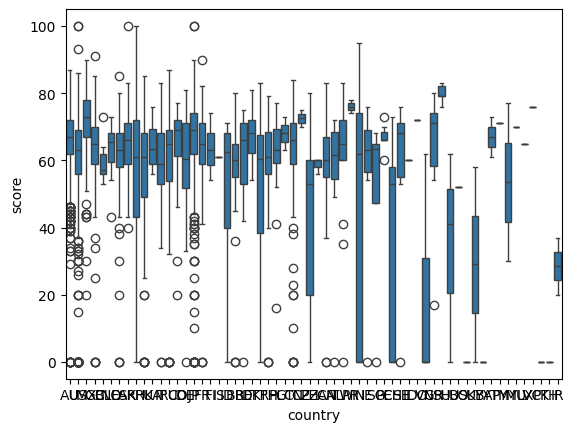

In [27]:
#2.Find the changes in score according to the different countries:
#Here we will be using the boxplot as it will show the meadian values score of all the countries
#plus help us to identfy if there exists any outliers in the data:
sns.boxplot(x=df["country"],y=df["score"],data=df)
plt.show()


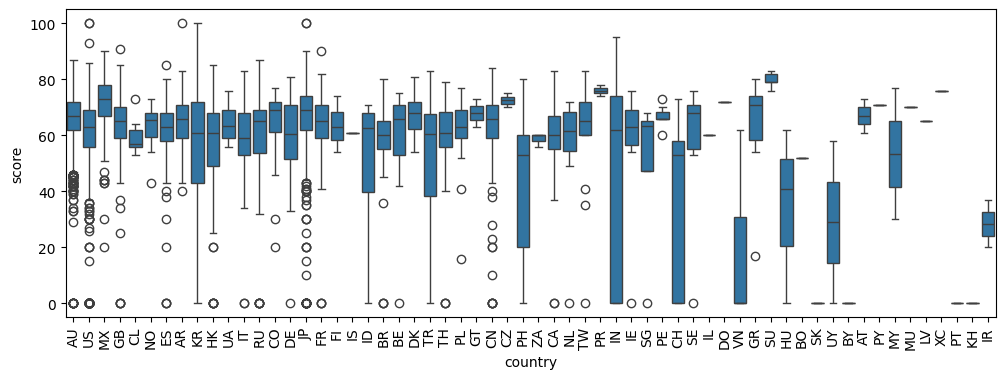

In [28]:
#as we can see the x axis value has become really unclear as of huge number of data,
#so we will fix the values by rotatating it to 90 degree so it will shown vertically,
#Additionally incresed the figsize (Note: Always put the figsize command at the start of code, else it wont work)
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
sns.boxplot(x=df["country"],y=df["score"],data=df)
plt.show()
#Analysis:
#Central Tendencies: For many countries, the median score (middle line in the boxes) appears around 50–70
#Top Performers:Some countries exhibit a narrow range of high scores (short whiskers and higher box positioning), 
#reflecting consistent performance, example:Soviet union(su),Pr.
#Outliers: Many countries show significant outliers (dots outside the whiskers).
#High range: Countries like korea,IN and several other showed a huge range of score indicating unconsistant and high spread in score,
#however most of the movies being above 50.

In [29]:
#2. Whether the budget and the movie has any correlation?
#Here as we can't see a numerical correlation as the movie column doesnot exist here,
#even if we use the name through tiltle column its impossible to see realtionship with as it being string column.
#so we will use the revenue column as the indicator of movie as it will show the movies performance.
#Here we used numpy to fine the correlation between both column:
correlation_matrix = np.corrcoef(df["budget_x"],df["revenue"])
correlation_matrix


array([[1.        , 0.67382957],
       [0.67382957, 1.        ]])

In [30]:
#As we also wanted to visualise our data, so we dicided to convert the data to DataFrame.
df4=pd.DataFrame(correlation_matrix)
df4

,0,1
0,1.00000,0.67383
1,0.67383,1.00000


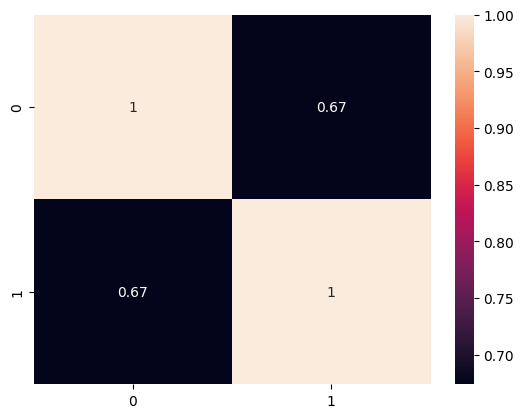

In [31]:
#Used heatmap to visualize the correlation:
sns.heatmap(data=df4,annot=True)
plt.show()
#Analysis:
#Positive realtionship: as budget increased the revenue also increased as a correlation of +0.67 shows a strong postive correaltion)

In [32]:
#Genre-specific Analysis: Task to delve deeper into the genre of movies.
#1.Which genre has the highest average score? Calculate the average score for each genre and plot the resullt.
gb_genre_avg_score=df.groupby("genre").agg({"score":"mean"})
gb_genre_avg_score

,score
genre,
Action,59.802326
"Action, Adventure",62.166667
"Action, Adventure, Animation",62.333333
"Action, Adventure, Animation, Comedy",69.000000
"Action, Adventure, Animation, Comedy, Family",68.000000
...,...
"Western, Horror, Mystery",63.000000
"Western, Mystery",56.000000
"Western, Mystery, Thriller, Drama",71.000000


In [33]:
#Here we got the avergae score of genre, however the values are not sort on descending from high to low,
#so lets sort the values based on score to get proper order:
gb1=gb_genre_avg_score.sort_values(by="score",ascending=False)
gb1

,score
genre,
"Fantasy, Drama, Crime",85.000000
"Adventure, Animation, Comedy, Fantasy, Mystery",85.000000
"Romance, Animation, Drama",85.000000
"Animation, Comedy, Romance",84.666667
"Family, Animation, Drama",83.000000
...,...
"Fantasy, Drama, Comedy",0.000000
"Drama, Crime, TV Movie",0.000000
"TV Movie, Romance, Drama",0.000000


In [34]:
#Here now we got the values in descending however as there are more than 2000 genres s0,
#We will only look for top 5 here so that the visualization would be clear:
gb2=gb1.head(5)
gb2

,score
genre,
"Fantasy, Drama, Crime",85.000000
"Adventure, Animation, Comedy, Fantasy, Mystery",85.000000
"Romance, Animation, Drama",85.000000
"Animation, Comedy, Romance",84.666667
"Family, Animation, Drama",83.000000


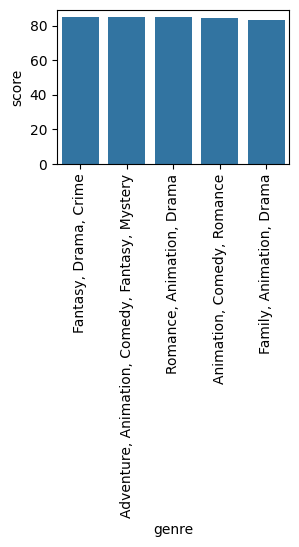

In [35]:
plt.figure(figsize=(3,2))
sns.barplot(x=gb2.index,y=gb2["score"],data=gb2)
plt.xticks(rotation=90)
plt.show()
#used the barplot to see the data distribution.
#Analysis:
#Top genre by average score led by avdenture,animation,comedy,fantasy,Mystery which is mixed of all followed by others.

In [36]:
#2.How does the popularity of genres vary over time?
#plot the movies released per genre each year
#As to see the popularity in different time frame, lets first obtain the new "year" column,
#through "date_x" column: 
df['year'] = df['date_x'].dt.year
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,year
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995


In [37]:
gb3=gb_genre_years_revenue=df.groupby(["year","genre"]).agg({"revenue":"sum"}).reset_index()
gb3
#Here now we grouped by data based on year and genre and chose revenue as an aggregate value,
#as the revenue of particular genre could reflect the popularity of the particluar time frame.
#Additionally, we added the value in new varaible named as gb3 as to make varaible name easier for further work...

,year,genre,revenue
0,1903,"Drama, History",5.247594e+08
1,1907,"Adventure, Science Fiction",3.996247e+07
2,1915,"Drama, History, War",2.789101e+07
3,1920,"Drama, Horror, Thriller, Crime",8.811000e+03
4,1923,"Comedy, Romance, Thriller",1.500000e+06
...,...,...,...
6433,2023,"War, Drama, History",3.446265e+08
6434,2023,"War, History, Drama",2.000000e+07
6435,2023,Western,3.213067e+08
6436,2023,"Western, Action",2.084531e+08


In [38]:
#As we had more than 6000 values generated before, however we were only looking for the only one value,
#from each year whose revenue was in top 1 so, we used loc[] and utilized idmax() to get the,
#top values from the row level:
top_genres_per_year = gb3.loc[gb3.groupby("year")["revenue"].idxmax()]
print(top_genres_per_year)

      year                           genre       revenue
0     1903                  Drama, History  5.247594e+08
1     1907      Adventure, Science Fiction  3.996247e+07
2     1915             Drama, History, War  2.789101e+07
3     1920  Drama, Horror, Thriller, Crime  8.811000e+03
5     1923                           Drama  8.648584e+07
...    ...                             ...           ...
5192  2019                           Drama  7.723456e+09
5462  2020                  Drama, Romance  1.212482e+10
5726  2021                           Drama  1.323038e+10
6058  2022                     Documentary  2.720130e+10
6316  2023                          Comedy  7.759412e+09

[99 rows x 3 columns]


In [39]:
df3=pd.DataFrame(top_genres_per_year)
df3
#To visualise we converted to new DataFrame named as df3.

,year,genre,revenue
0,1903,"Drama, History",5.247594e+08
1,1907,"Adventure, Science Fiction",3.996247e+07
2,1915,"Drama, History, War",2.789101e+07
3,1920,"Drama, Horror, Thriller, Crime",8.811000e+03
5,1923,Drama,8.648584e+07
...,...,...,...
5192,2019,Drama,7.723456e+09
5462,2020,"Drama, Romance",1.212482e+10
5726,2021,Drama,1.323038e+10
6058,2022,Documentary,2.720130e+10


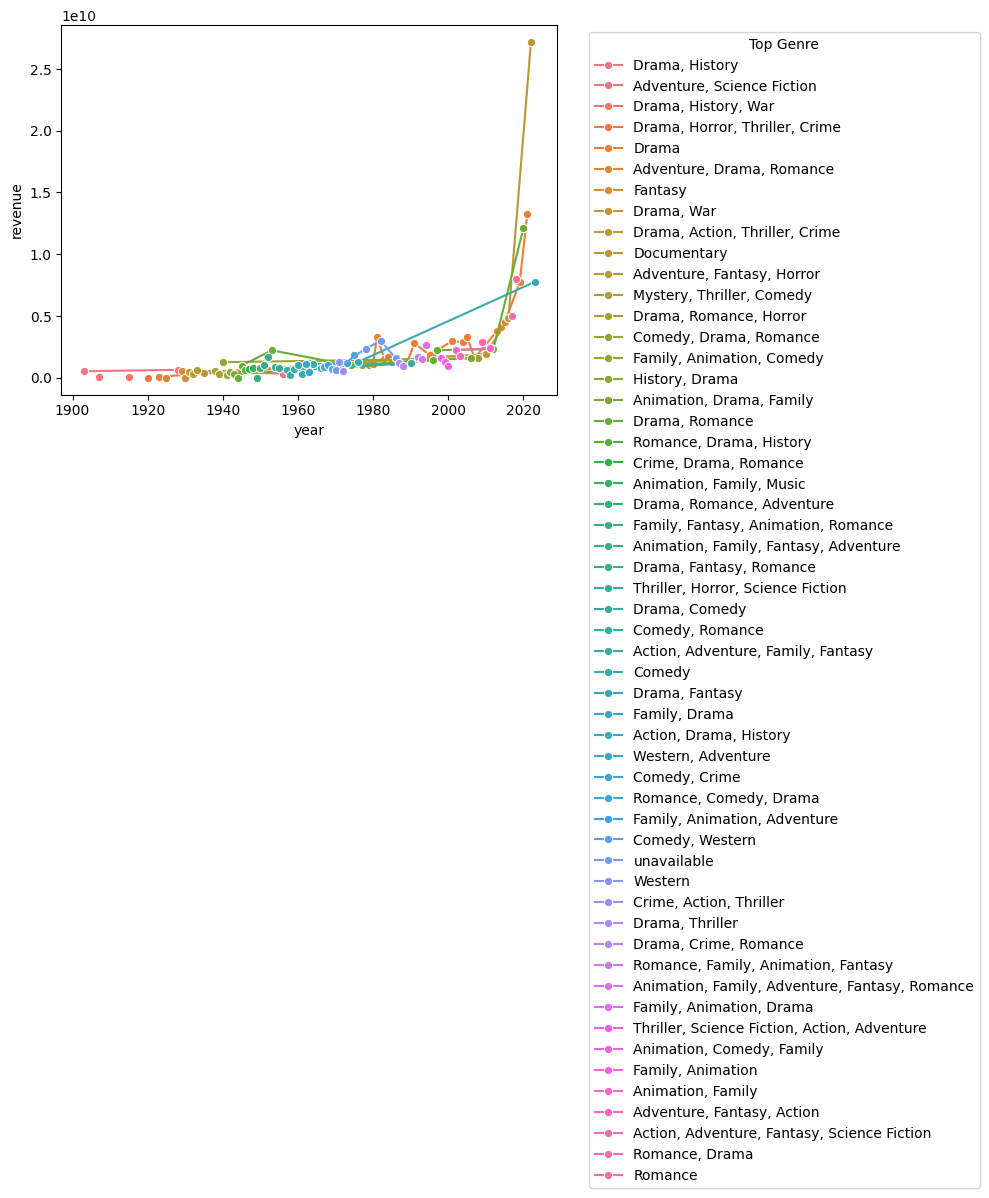

In [40]:
sns.lineplot(x='year', y='revenue', hue='genre', data=df3,marker="o")
plt.legend(title="Top Genre",bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()
#Here we used lineplot to visualize changes in data according to the time,
#Additionally as legends were coming inside the plot and making line chart unclear,
#we used bbox and loc function to move it to the right side of the plot.

In [41]:
#2.Are there certain generes that tend to have longer runtimes?use boxplots to compare genre running across time:
# Grouped by genre and find the minimum and maximum years
genre_time_span = df.groupby("genre").agg(
    min_year=("year", "min"),
    max_year=("year", "max")
)

# Calculate the time span for each genre
genre_time_span["time_span_years"] = genre_time_span["max_year"] - genre_time_span["min_year"]

# Sort genres by longest time span
longest_running_genres = genre_time_span.sort_values("time_span_years", ascending=False)
print(longest_running_genres.head())


                            min_year  max_year  time_span_years
genre                                                          
Drama, History                  1903      2023              120
Adventure, Science Fiction      1907      2022              115
Drama, History, War             1915      2021              106
Drama                           1923      2023              100
Comedy, Romance, Thriller       1923      2022               99


In [42]:
df4=pd.DataFrame(longest_running_genres.head())
df4

,min_year,max_year,time_span_years
genre,,,
"Drama, History",1903,2023,120
"Adventure, Science Fiction",1907,2022,115
"Drama, History, War",1915,2021,106
Drama,1923,2023,100
"Comedy, Romance, Thriller",1923,2022,99


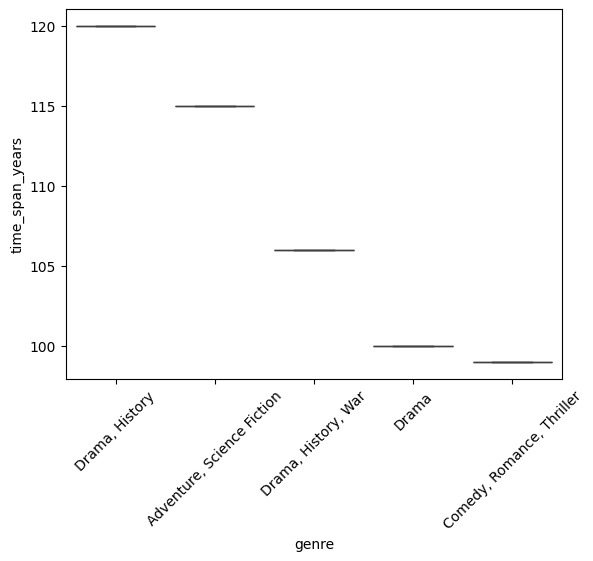

In [43]:
sns.boxplot(x=df4.index,y=df4["time_span_years"],data=df4)
plt.xticks(rotation=45)
plt.show()

In [44]:
#Year and Trend Analysis: Analyse trends overtime.
#1.How has the average movie scores changed over the years?plot the average score for each year.
#Lets first group by the score by years then according to the year, we aggregate the mean value:
gb4=df.groupby("year").agg({"score":"mean"})
gb4



,score
year,
1903,63.000000
1907,80.000000
1915,61.000000
1920,80.000000
1923,71.666667
...,...
2019,64.263830
2020,64.220490
2021,66.057416


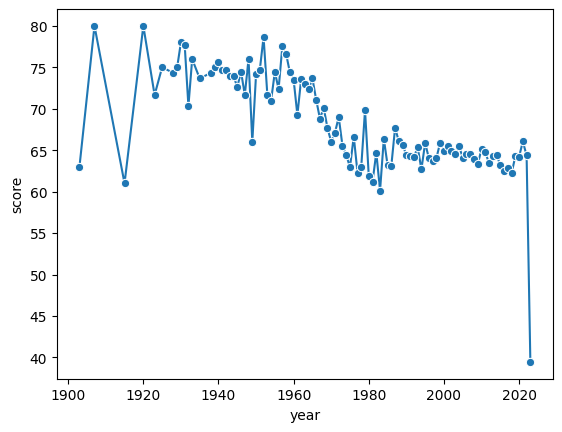

In [50]:
#Now we can plot the values in the line chart to do the time frame analysis:
sns.lineplot(x=gb4.index, y="score",data=gb4,marker="o")
plt.show()
#Analysis:
#According to the data since 1990 till 2010, the average score are mostly above 60,
#maxium score year were 1910 and 1930 and contineous drop after 1960 with minium and sudden crash after 2020.


In [73]:
#2.Which years had the highest and lowest number of movie release? Plot the number of movies released each year.
#Lets first group by the movies by its year and count aggregate to find total movies released each year:
gb5=df.groupby("year").agg({"names":"count"})
gb5

,names
year,
1903,1
1907,1
1915,2
1920,1
1923,3
...,...
2019,470
2020,449
2021,627


In [86]:
Max=gb5.loc[gb5.idxmax()]
Max


,names
year,
2022,954


In [75]:
Min=gb5.loc[gb5.idxmin()]
Min

,names
year,
1903,1


In [ ]:
#AS there were other few questions needed to be answer such as:
#1.Most popular genre per decade
#2.Specific genres or release years with higher rated movies:
#Both of these question has a similar purpose to what you did before we'll be skiping it as it is kind of similar.


#Insights and Summary:
#1.Movie Trends Over the Years: 
Over time, the number of movies released has seen significant growth,
From earlier years (e.g., 1900s with 1-2 movies per year) to recent decades (e.g., 2022 with 954 movies),
there is a clear upward trend, reflecting the expansion of the film industry and advancements in technology and global reach.

#2.Most Popular Genre over History:
Certain genres like Drama and Horror tend to span a longer timeline, indicating their consistent popularity across different eras. Genres like Adventure or Science Fiction became more prominent in later years, showing how tastes have evolved alongside technology and societal changes.

#3.Average Movie Scores:
Analyzing average scores shows periods of fluctuating quality, with some decades having highly acclaimed movies while others have average or declining scores. This trend could reflect the industry's focus on certain types of storytelling, budgets, or audience expectations during those times.

#Potential Questions to Explore for New Insights:
Audience Preference Trends:
How have audiences' preferences for specific genres shifted over the years? For example, are genres like Sci-Fi more dominant in recent years compared to Comedy in the 1980s?

Top Performing Movies:
Which specific genres tend to consistently perform better in terms of scores across decades?

Genre Diversity in Recent Years:
Has the diversity of genres released each year increased? Which time period showcases the highest variety in genres?
